In [9]:
from cellori import Cellori
import pandas as pd
import glob


# all import statements
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import tifffile
import pandas as pd
import seaborn as sns
import time
import os
import glob
from skimage import measure
import skimage.measure as skmeas
from PyQt5 import QtCore, QtGui, QtWidgets
from statannot import add_stat_annotation


Image.MAX_IMAGE_PIXELS = None

%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [34]:
#Path to files from Step1
main_path = "/Volumes/rag_big_2/Raul/20240601_NewData/20240604_iPI3K/Cellori_clean"
paths_to_all_pik = glob.glob(main_path+"/*.pkl")

#Name of sample names
want = ['iPI3K_W','iPI3K_c']

colony_all_files = []
colony_hold = []
colony_name = []

for i in paths_to_all_pik:
    #print("         " + i )
    
    name_compare = i.split("/")[-1].split('.')[0].split('Plate2024_06_04_RAR_')[-1][0:7]
    print(name_compare)
    if len(set(want)&set([name_compare])) == 1:

        df_points = pd.read_pickle(i)


        #Get all colony sizes
        for k,m in enumerate(np.unique(df_points['colonyID'])):
            if m != -1:
                colony_hold.append(len(df_points.loc[df_points['colonyID'] == m]))
                colony_name.append(name_compare)
                           
    colony_all_files.append(colony_hold)

iPI3K_c
iPI3K_c
iPI3K_c
iPI3K_c
iPI3K_c
iPI3K_c
iPI3K_W
iPI3K_W
iPI3K_W
iPI3K_W
iPI3K_W
iPI3K_W


In [35]:
d = {'values':colony_hold,'names':colony_name}
# Create the pandas DataFrame
df = pd.DataFrame(data=d)
 
# specifying column names
#df.columns = names_crispr
 
# print dataframe.
print(df, "\n")

     values    names
0        84  iPI3K_c
1       100  iPI3K_c
2        16  iPI3K_c
3        24  iPI3K_c
4        12  iPI3K_c
..      ...      ...
317       8  iPI3K_W
318       8  iPI3K_W
319      12  iPI3K_W
320       8  iPI3K_W
321       8  iPI3K_W

[322 rows x 2 columns] 



In [36]:
# remove colonies of a single clone
df = df[df.iloc[:,0] > 1]

iPI3K_c v.s. iPI3K_W: t-test independent samples with Bonferroni correction, P_val=1.080e-09 stat=6.284e+00


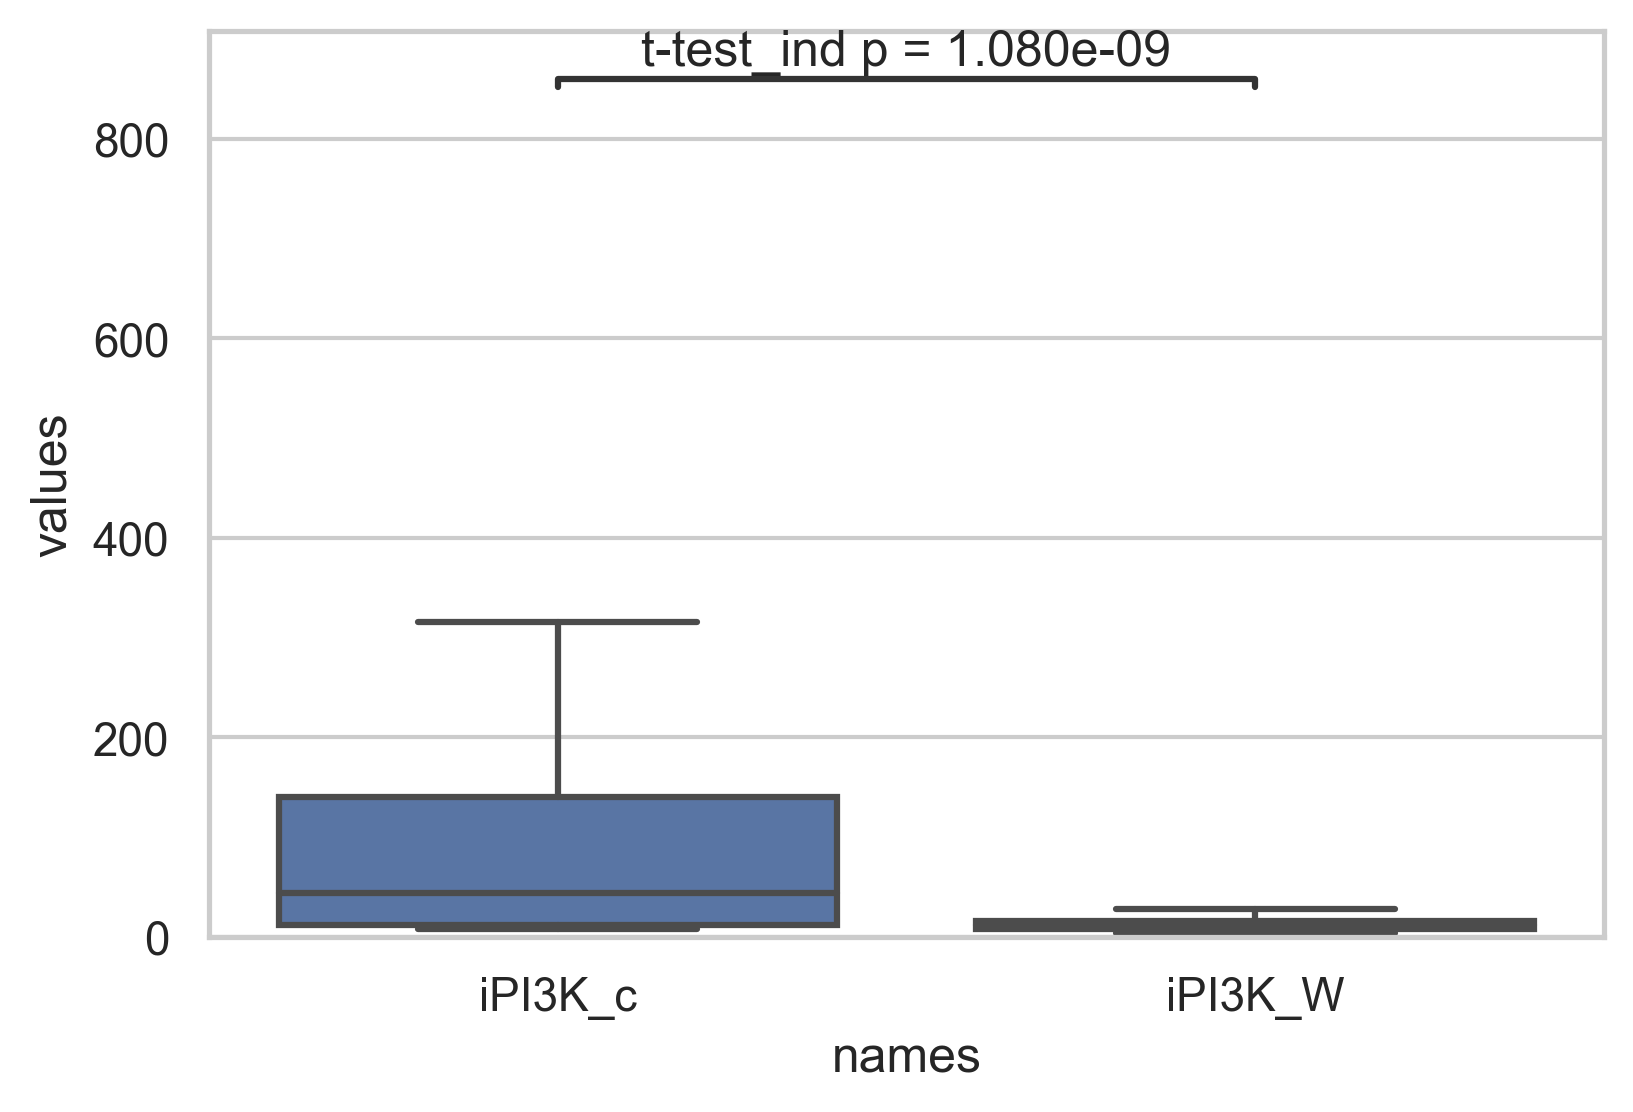

In [39]:
# Define the order of the categories
order = ['iPI3K_c','iPI3K_W']

# Create the boxplot with the specified order
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="names", y="values", data=df, order=order, showfliers=False)
plt.ylim(0,400)
# Add statistical annotation
box_pairs = [('iPI3K_c','iPI3K_W')]

add_stat_annotation(ax, data=df, x="names", y="values",
                    order=order, box_pairs=box_pairs,
                    test='t-test_ind', text_format='full', loc='inside', verbose=2)

# Save and show the plot
output_path = "/Users/raul/Documents/GitHub/EsophagealCloneVariability/RAR055/plots/iPI3K_rep2.pdf"
plt.savefig(output_path, bbox_inches='tight')
plt.show()